### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

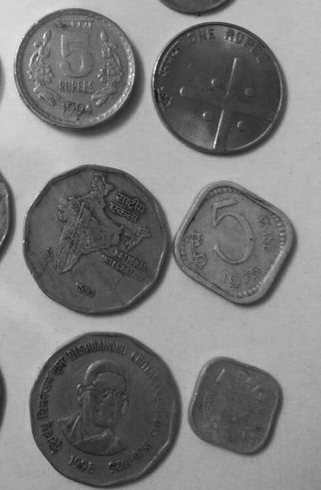

In [3]:
coins = cv2.imread("Monety_szare.bmp", cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

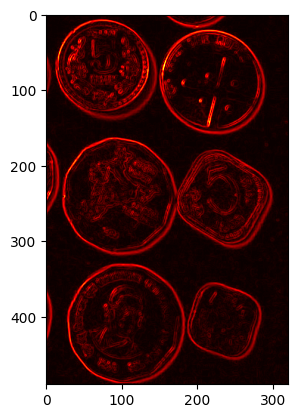

In [6]:
grad_x = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3)

grad_magnitude = cv2.magnitude(grad_x, grad_y)
grad_magnitude = cv2.normalize(grad_magnitude, None, 0, 255, cv2.NORM_MINMAX)
grad_magnitude = np.uint8(grad_magnitude)

plt.imshow(grad_magnitude, cmap="hot")

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

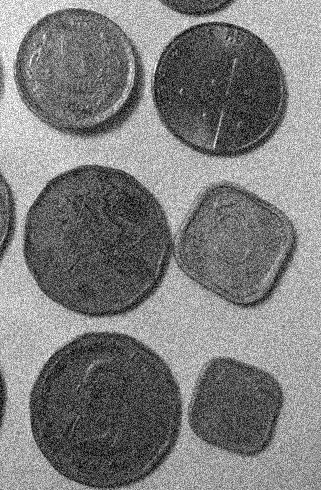

In [8]:
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

255
255
255
255


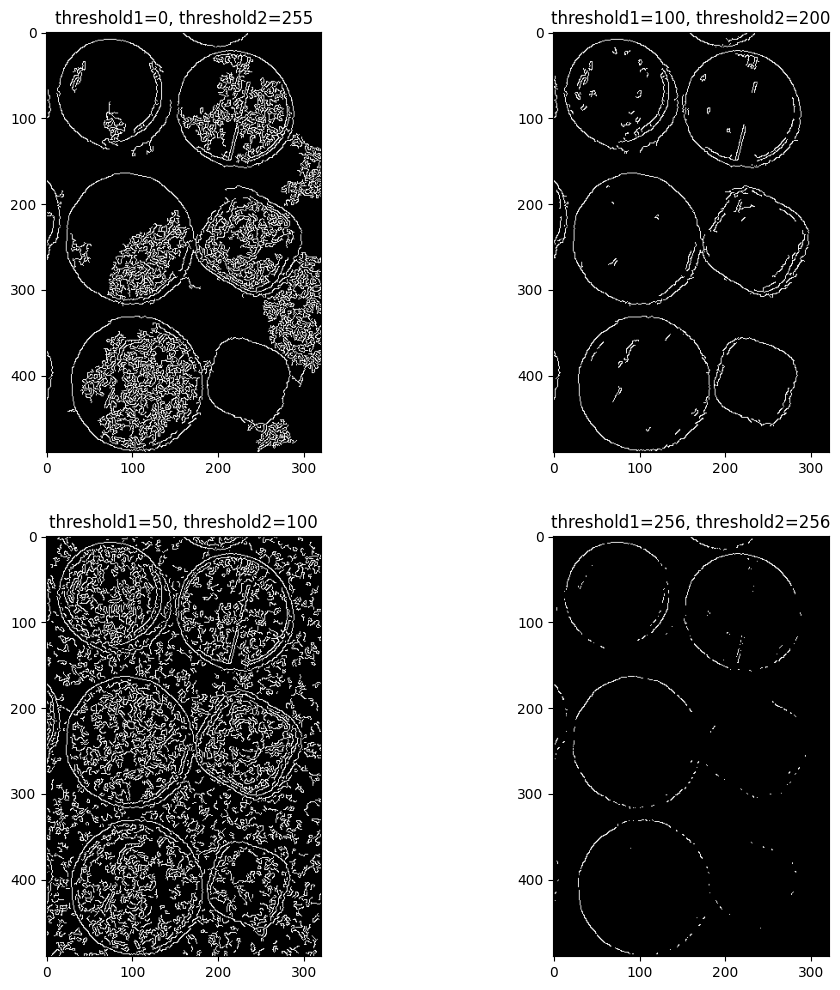

In [36]:
threshold1_values = [0, 120, 255]
threshold2_values = [0, 120, 255]

# threshold1 - lower boundary for edge detection
# - any edge with a gradient intensity below this value will be discarded

# threshold2 - upper boundary for edge detection
# - any edge with a gradient intensity above this value will be kept

threshold_values = [
    (0, 255),
    (100, 200),
    (50, 100),
    (256, 256),
]
coins_noise_blur = cv2.GaussianBlur(coins_noise, (5, 5), 0)


plt.figure(figsize=(12, 12))
for i, (threshold1, threshold2) in enumerate(threshold_values):
    edges = cv2.Canny(
        image=coins_noise_blur, threshold1=threshold1, threshold2=threshold2
    )

    print(edges.max())
    plt.subplot(2, 2, i + 1)
    plt.imshow(edges, cmap="gray")
    plt.title(f"threshold1={threshold1}, threshold2={threshold2}")

plt.show()

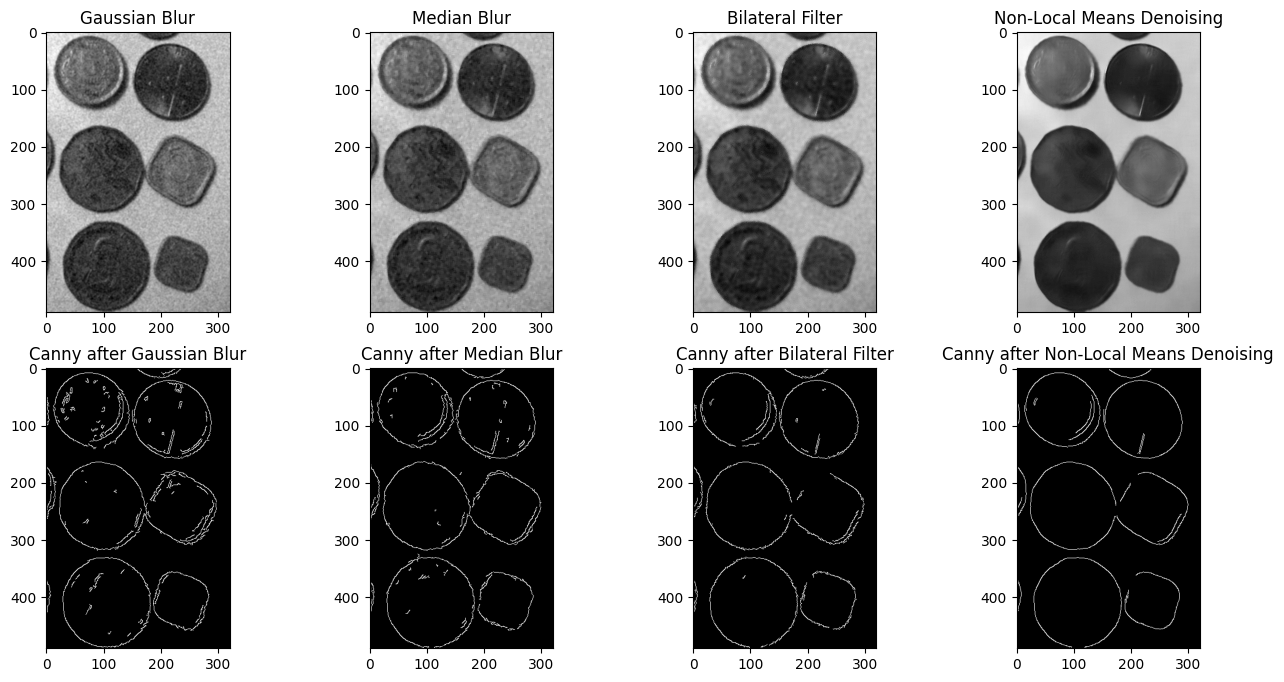

In [44]:
import cv2
import matplotlib.pyplot as plt

blurring_methods = [
    (cv2.GaussianBlur(coins_noise, (5, 5), 0), "Gaussian Blur"),
    (cv2.medianBlur(coins_noise, 5), "Median Blur"),
    (cv2.bilateralFilter(coins_noise, 9, 75, 75), "Bilateral Filter"),
    (
        cv2.fastNlMeansDenoising(coins_noise, None, 30, 7, 21),
        "Non-Local Means Denoising",
    ),
]

canny_results = [
    (cv2.Canny(blurred, 100, 200), f"Canny after {name}")
    for blurred, name in blurring_methods
]

plt.figure(figsize=(16, 8))

for i, (blurred, name) in enumerate(blurring_methods):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blurred, cmap="gray")
    plt.title(name)

for i, (canny, name) in enumerate(canny_results):
    plt.subplot(2, 4, i + 5)
    plt.imshow(canny, cmap="gray")
    plt.title(name)

plt.show()

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

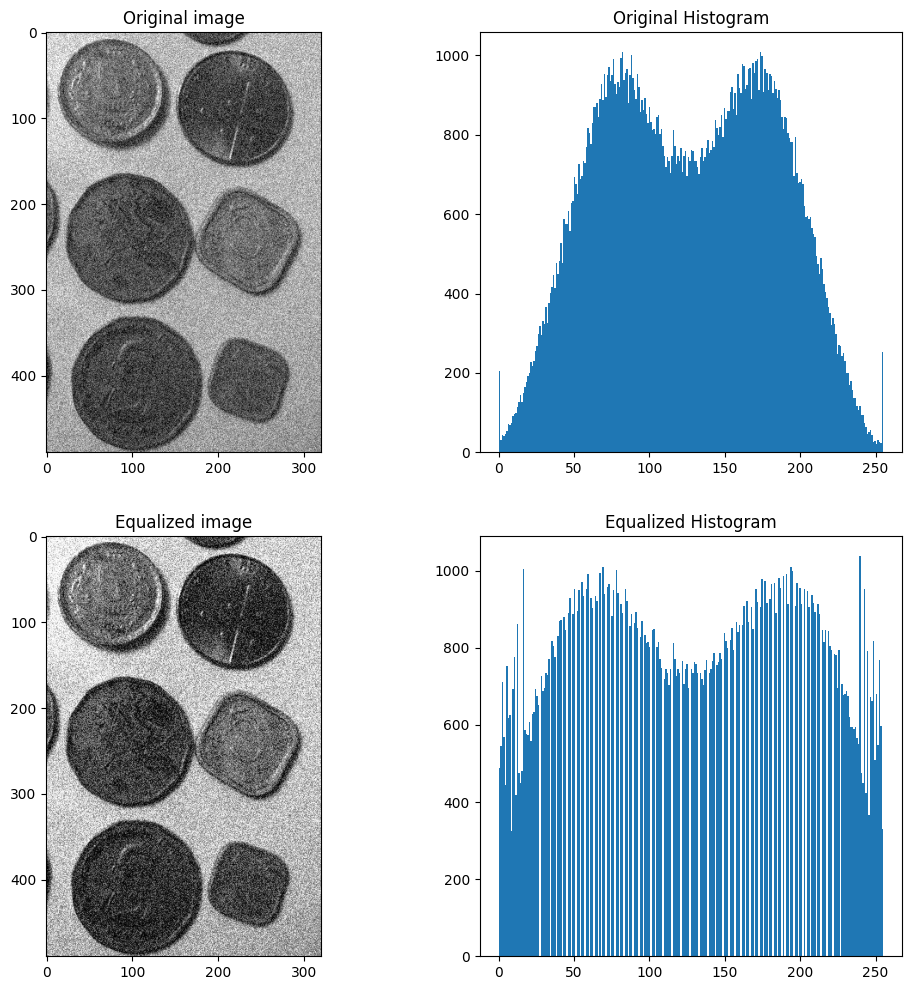

In [62]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(coins_noise, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Original Histogram")
_ = plt.hist(coins_noise.ravel(), 256)

plt.subplot(2, 2, 3)
plt.title("Equalized image")
coins_noise_equalized = cv2.equalizeHist(coins_noise)
plt.imshow(coins_noise_equalized, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
_ = plt.hist(coins_noise_equalized.ravel(), 256)

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

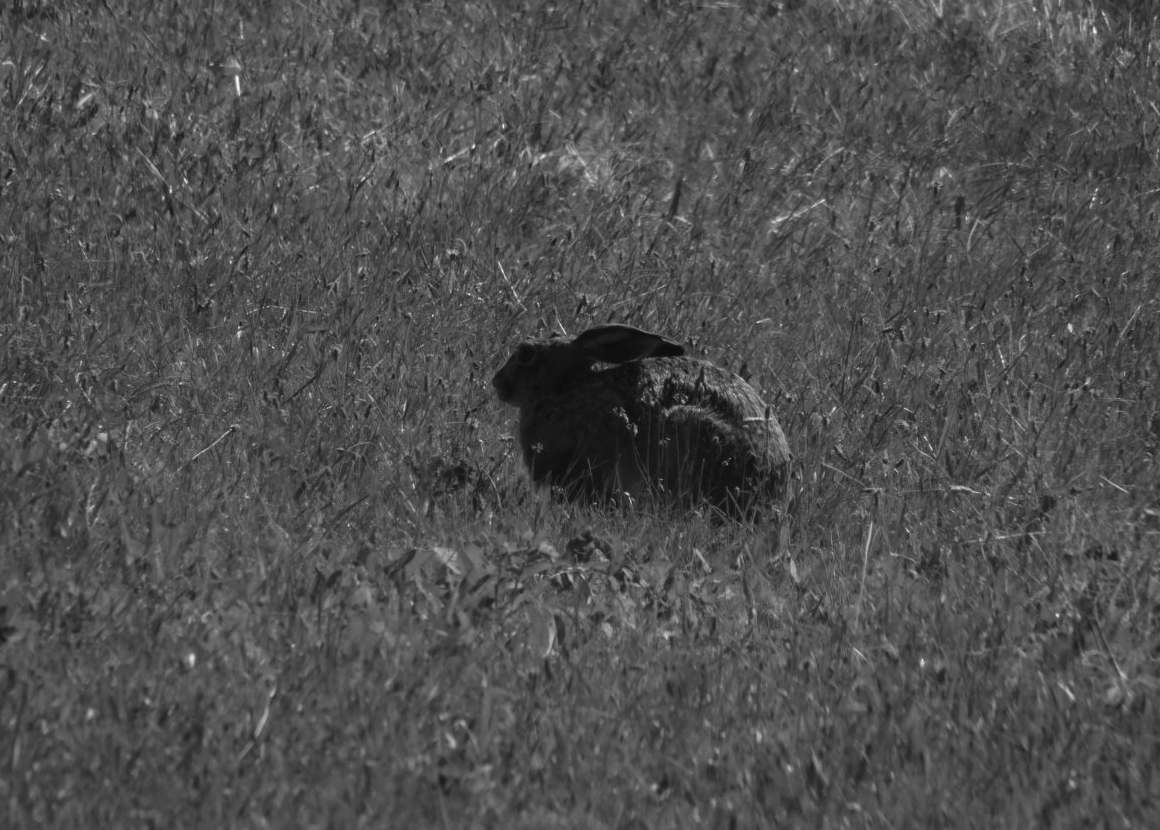

In [5]:
hare_gray = cv2.imread("Zajac.jpg", cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie: